In [2]:
# LLM Initialization
import os
#from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage

#load_dotenv()

groq_api_key =os.environ.get("GROQ_API_KEY")
llm = ChatGroq(api_key=groq_api_key, model="llama-3.1-8b-instant",temperature=0.7,max_tokens=None)

In [ ]:
from langchain_core.prompts import PromptTemplate
user_input=input("Enter a topic for a joke: ")
dynamic_prompt = PromptTemplate.from_template("Tell me a funny joke about {topic} that south indian teenagers would appreciate.")
ready_prompt = dynamic_prompt.invoke({"topic": user_input})
llm.invoke(ready_prompt).content

"As I'm not aware of any specific joke about Ram Charan that would be widely known to South Indian teenagers, I'll create a humorous one based on his popularity as an actor. Keep in mind that this might not be universally funny and is just a light-hearted attempt.\n\nJoke: Why did Ram Charan bring a ladder to the set?\n\nAnswer: He wanted to take his performances to 'RRR' heights! (Reference to his movie RRR, which was a massive hit)\n\nPlease note that this is a lighthearted attempt and may not be funny to everyone."

: 

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
chat_prompt = ChatPromptTemplate.from_messages([
 
    
    ("system", "You are a helpful assistant that provides jokes on various topics."),
    ("user","Write a funny joke about {topic} that south indian teenagers would appreciatee, Return result in key value pair with keys 'joke' and 'explanation'. The tone of the joke should be {tone}."),

])
user_input=input("Enter a topic for a joke: ")
user_tone=input("Enter the tone of the joke (e.g., witty, sarcastic, light-hearted): ")
ready_prompt = chat_prompt.invoke({"topic": user_input, "tone": user_tone})
llm.invoke(ready_prompt.messages).content

"Here's a Bollywood joke that South Indian teenagers might appreciate:\n\n**Joke**\nWhy did the South Indian actor refuse to act in a Bollywood movie?\nBecause he heard the script was full of 'mass' issues and he didn't want to 'pull' a Rajinikanth.\n\n**Explanation**\nThis joke is a play on words. 'Mass' is a term used in South Indian cinema to describe a scene or a dialogue that is meant to be dramatic and over-the-top. However, in this joke, the actor is making a sarcastic comment about the script being full of 'mass' issues, implying that it's too dramatic or overdone. The second part of the joke is a reference to Rajinikanth, a legendary South Indian actor known for his larger-than-life persona and signature style of acting. The phrase 'pull a Rajinikanth' is a colloquialism that means to act in a way that's ridiculously dramatic or over-the-top, like Rajinikanth would. The joke is sarcastic because it's poking fun at the idea of trying to emulate Rajinikanth's style, which is oft

: 

**Directing LLM's to create Fixed or Structured schema:**

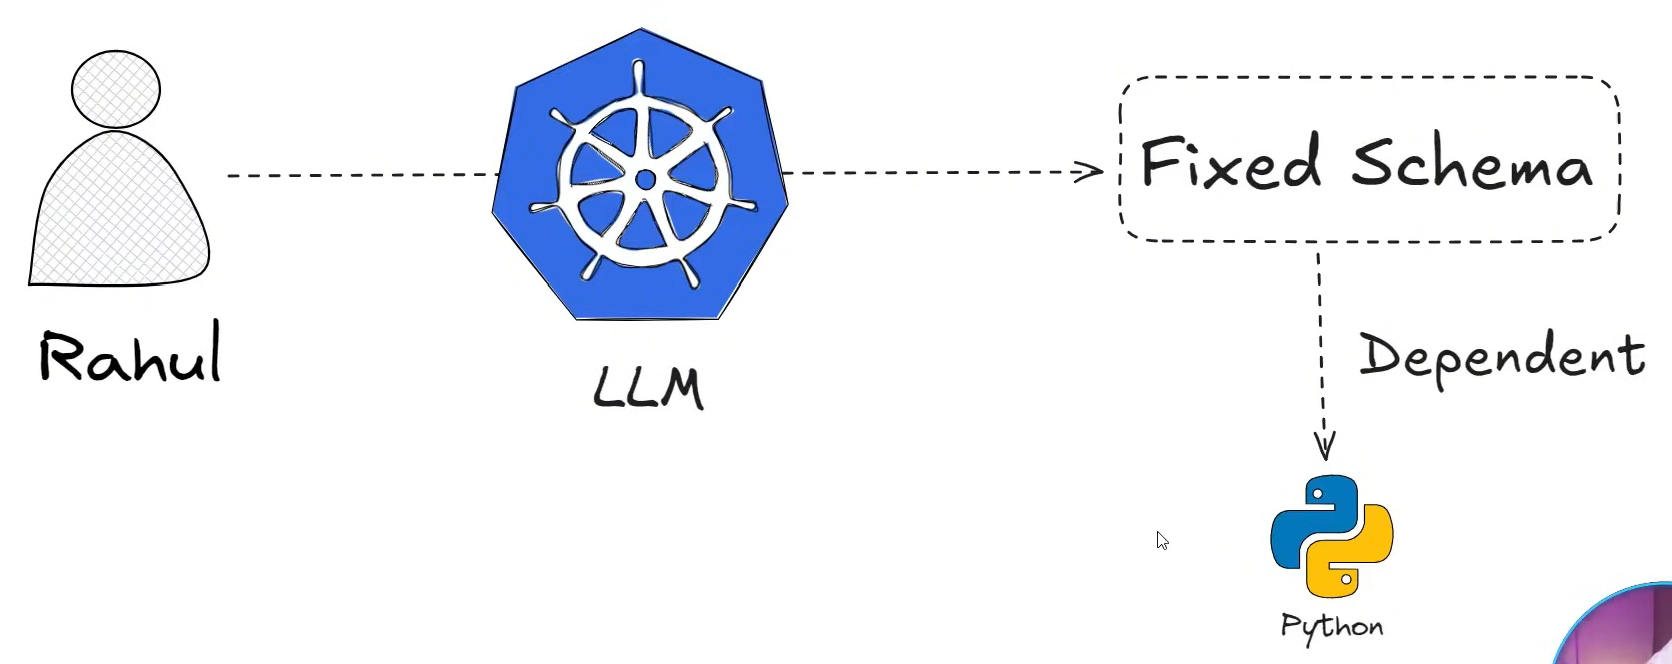

In [ ]:
# With out Pydantic models
from langchain_core.prompts import PromptTemplate
result=llm.invoke("Tell me a funny joke. Generate output in key value pair with keys 'joke' and 'explanation'.")
result.content

'Here\'s a funny joke for you:\n\n```json\n{\n  "joke": "A man walked into a library and asked the librarian, \'Do you have any books on Pavlov\'s dogs and Schrödinger\'s cat?\' The librarian replied, \'It rings a bell, but I\'m not sure if it\'s here or not.\'",\n  "explanation": "This joke combines two scientific concepts: Pavlov\'s dogs, who associated the sound of a bell with food, and Schrödinger\'s cat, who is in a state of superposition (both existing and not existing at the same time). The librarian\'s response is a play on words, referencing both concepts in a humorous way."\n}\n```\n\nI hope that brings a smile to your face!'

: 

**Structured Output from LLM's using Pydantic Models**

In [3]:
#With Pydantic Models
from pydantic import BaseModel

# Define the structure for the joke output
class llm_schema(BaseModel):
    joke: str
    explanation: str

# Create a structured LLM that returns data in the Joke format
structured_llm = llm.with_structured_output(llm_schema)
obj=llm_schema(joke="Why did the computer go to therapy? Because it had too many bytes of emotional baggage!", explanation="This joke plays on the double meaning of 'bytes' as both a unit of digital information and a metaphor for emotional issues. It's funny because it personifies the computer, suggesting it has feelings and needs therapy like a human would.")
obj

llm_schema(joke='Why did the computer go to therapy? Because it had too many bytes of emotional baggage!', explanation="This joke plays on the double meaning of 'bytes' as both a unit of digital information and a metaphor for emotional issues. It's funny because it personifies the computer, suggesting it has feelings and needs therapy like a human would.")

In [ ]:
#With Pydantic Models
from pydantic import BaseModel, Field

# Define the structure for the joke output
class llm_schema(BaseModel):
    joke: str= Field(description="The joke generated by the LLM")  # Adding description to the field to add more context to LLM
    explanation: str

# Create a structured LLM that returns data in the Joke format
structured_llm = llm.with_structured_output(llm_schema)
#  creating object of pydantic model
# obj=llm_schema(joke="Why did the computer go to therapy? Because it had too many bytes of emotional baggage!", explanation="This joke plays on the double meaning of 'bytes' as both a unit of digital information and a metaphor for emotional issues. It's funny because it personifies the computer, suggesting it has feelings and needs therapy like a human would.")
# obj


# Now invoke the LLM with structured output
import json
format_type = input("Enter the format (e.g., JSON, key-value): ").lower()
prompt = f"Tell me a funny joke."

try:
    result = structured_llm.invoke(prompt)

    # Format output based on user input
    if "json" in format_type:
        output = json.loads(result.model_dump_json())
        print(json.dumps(output, indent=2, ensure_ascii=False))
    elif "key" in format_type:
        print(f"joke: {result.joke}")
        print(f"explanation: {result.explanation}")
    else:
        print(result)
except Exception as e:
    print(f"Error: {e}")
    print("Retrying without structured output...")


{
  "joke": "Why couldn’t the bicycle stand up by itself?",
  "explanation": "I don’t know, tell me"
}


In [10]:
from typing import TypedDict

class llm_schema_typedict(TypedDict):
    setup: str
    punchline: str
# Here if i pass kethup instead of kethup, typedict takes it. doesn't error out.
# obj=llm_schema_typedict({"kethup":"some setup","punchline":"some punchline"})
# obj
llm_structured_typedict_dict=llm.with_structured_output(llm_schema_typedict)
result=llm_structured_typedict_dict.invoke("Tell me a joke")
result


{'punchline': 'Why don’t eggs tell jokes? They’d crack each other up!',
 'setup': 'I was reading a book about anti-gravity'}

**Python Data Validation: Pydantic vs. TypedDict**

The Core Difference
The fundamental distinction is when the validation happens.

TypedDict: Static analysis (IDE/Linter support only).

Pydantic: Runtime validation (Stops the code if data is bad).


1. TypedDict (The "Post-it Note")
Use Case: Internal performance-heavy code or when you want to keep data as a plain dictionary.

Pros: Zero performance overhead, no dependencies, perfect for JSON.

Cons: No runtime checks. It will not stop "bad" data from entering your app.

In [ ]:
from typing import TypedDict

class UserDict(TypedDict):
    id: int
    name: str

# IDE/Antigravity will give you autocompletion for keys:
user: UserDict = {"id": 1, "name": "Alice"}

# WARNING: This will NOT crash at runtime even though 'id' is a string.
# TypedDict is "invisible" to the Python interpreter during execution.
bad_user: UserDict = {"id": "not-an-int", "name": "Bob"} 

print(f"TypedDict Result: {bad_user}")

: 

2. Pydantic (The "Security Guard")
Use Case: External data boundaries (APIs, User Input, Config files).

Pros: Runtime safety, data coercion (auto-converts types), clear error messages.

Cons: Small performance overhead, requires the pydantic library.

In [ ]:
# Note: You may need to !pip install pydantic
from pydantic import BaseModel, ValidationError

class UserModel(BaseModel):
    id: int
    name: str

try:
    # SUCCESS: Pydantic automatically converts the string "10" to integer 10
    valid_user = UserModel(id="10", name="Charlie")
    print(f"Pydantic Coerced: {valid_user.id} ({type(valid_user.id)})")

    # FAILURE: This will trigger a ValidationError
    invalid_user = UserModel(id="not-an-int", name="Bob")
except ValidationError as e:
    print("\nPydantic caught the error at runtime:")
    print(e)

Pydantic Coerced: 10 (<class 'int'>)

Pydantic caught the error at runtime:
1 validation error for UserModel
id
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='not-an-int', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/int_parsing


: 

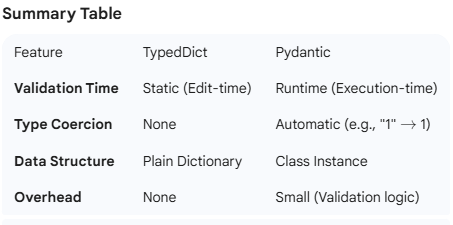

In Python, TypedDict is what we call "Type Hinting only." Once the code is actually running (at runtime), the Python interpreter treats a TypedDict exactly like a standard, plain old dictionary ({}).

Here are the three specific reasons why someone would choose TypedDict despite it having no "teeth":

1. Performance (Zero Overhead)
Because TypedDict is just a regular dictionary, there is zero performance penalty.

Pydantic has to run logic to check every field, which takes a few microseconds.

TypedDict does nothing at runtime. If you are processing millions of small objects per second, that extra speed matters.

2. No Dependencies
TypedDict is built into the Python Standard Library (since version 3.8).

You don't have to pip install anything.

If you are building a lightweight library and don't want to force your users to install Pydantic, TypedDict is the way to go.

3. Structural Compatibility (JSON)
Since a TypedDict is a dictionary, it is already "JSON serializable."

Pydantic: You have to call model.model_dump() to get a dictionary back.

TypedDict: You can just pass it straight into json.dumps(my_dict) because it never stopped being a dictionary.


**Think of it like this:**

TypedDict is like a Post-it note on a box that says "This box should only contain apples." If you put a banana in there, the note doesn't stop you, but a person (the IDE/Linter) looking at the note will tell you that you're making a mistake.

Pydantic is like a Security Guard standing in front of the box. If you try to put a banana in, the guard grabs your arm and stops the process entirely.